In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

# Verileri Ayırma

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Normalizasyon

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVC

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Parametre ızgarasını tanımla
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# GridSearchCV nesnesini oluştur
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)

# Grid search'i veriye uygula
grid.fit(X_train, y_train)

# En iyi parametreleri al
print("Bulunan en iyi parametreler: ", grid.best_params_)

# En iyi modeli al
best_model = grid.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Bulunan en iyi parametreler:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [7]:
# En iyi modeli kullanarak tahmin yap
y_pred = best_model.predict(X_test)

# Metrikler

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.93


Accuracy: 0.93
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076922


Text(0.5, 1.0, 'Karmaşıklık Matrisi')

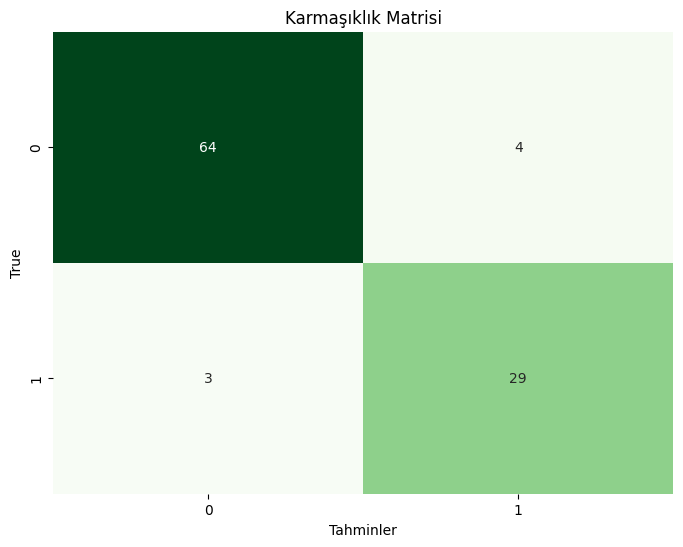

In [9]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Tahminler')
plt.ylabel('True')
plt.title('Karmaşıklık Matrisi')